In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import random
import pandas as pd
import scipy.stats as stats

## Week 4 of Coding: Feb 7th-Feb 14th

Create a function that incorporates all of the previous functions you made into one big one. Basically creates a large function that you input a few arrays and it generates a power spectra box.

In [131]:
#Make a function to shift, transform, and shift back
def cosmo_transform(input_box):
    #shifting the zero frequency component to the center
    shift_1 = np.fft.fftshift(input_box)
    
    #fourier transform after the shift
    #need to fourier transform here, shift does not transform alone
    transformed_box = np.fft.fftn(shift_1)
    
    #shifting the zero-frequency component back to its assumed numpy
    #original position
    shift_2 = np.fft.ifftshift(transformed_box)
    #plt.imshow(np.real(shift_2))
    
    return shift_2


#creating a function to generate the k_x frequency array
def kx_frequency_array(one_D_array):
    #fourier transform to frequency space
    #need to fourier transform here, shift does not transform alone
    #1D array containing the wavevectors 
    #by multiplying by the total # of pixels, we convert them to pixel freq.
    kfreq = np.fft.fftfreq(one_D_array)*2*np.pi
    
    #shifting back to its assumed numpy position
    k_x = np.fft.fftshift(kfreq)
    
    return k_x


#creating a function to generate the k_y frequency array
def ky_frequency_array(one_D_array):
    #fourier transform to frequency space
    #need to fourier transform here, shift does not transform alone
    #1D array containing the wavevectors 
    #by multiplying by the total # of pixels, we convert them to pixel freq.
    kfreq = np.fft.fftfreq(one_D_array)*2*np.pi
    
    #shifting back to its assumed numpy position
    k_y = np.fft.fftshift(kfreq)
    
    return k_y


#finding the element positions given our k parameters
def find_element_positions(input_k, start, end):
    
    positions = []
    #iterating through each element in the start and end arrays
    for k in range(len(start)):
        sub_positions = []
        #iterating through first dimension of input_k
        for i in range(len(input_k)):
            #iterating through second dimension of input_k
            for j in range(len(input_k[0])):
                #for elements within our inputted desired range
                if start[k] - 1 <= input_k[i][j] <= end[k] - 1:
                    sub_positions.append((i, j))
        positions.append(sub_positions)
    
    #will return tuples that given the locations of the elements in the given range
    return positions



#find corresponding [i,j] positions in fourier transform array 
#should be same dimensions as k array
def get_corresponding_values(input_k, fourier_array, start, end):
    #calling function that returns position tuples
    positions = find_element_positions(input_k, start, end)
    
    #empty list to store the values
    values = []
    
    #iterate through rows in the positions array
    for pos_row in positions:
        #initialize an empty list to store each row's values
        row_values = []
        #iterate through pair of indices in the row
        for i, j in pos_row:
            #index into fourier array and store value
            row_values.append(fourier_array[i][j])
            
        #append values for this row into overall values list
        values.append(row_values)
    
    return values


#finding averages of the values at each position
def avg_corresponding_values(input_k, fourier_array, start, end):
    
    #get our corresponding values 2D array
    values = get_corresponding_values(input_k, fourier_array, start, end)
    
    #creating empty avg_values array
    avg_values = []
    #separating out ranges
    for row in values:
        row_sum = 0
        #for each value in the row
        for i in row:
            row_sum += i
            #taking the average value for the row
            avg = row_sum/len(row)
            
        avg_values.append(avg)
    
    return avg_values
    
    
#creating the power spectra plot
def power_spectra_plot(input_k, fourier_array, start, end, sigma):
    
    #getting the average fourier value for the chosen k range
    avg_values = avg_corresponding_values(input_k, fourier_array, start, end)
    print(avg_values)
    #list of integers from our chosen range values
    #will be the labels for the x-axis
    range_values = list(range(len(start)))
    
    plt.figure(figsize = (8,8))
    plt.scatter(range_values, avg_values)
    
    #plot specifications
    plt.xlabel("$k$", size = 15)
    plt.ylabel("$P(k)$", size = 15)
    plt.tick_params(bottom=True, top=True, left=True, right=True)
    plt.errorbar(range_values, avg_values, yerr=sigma, fmt='o')
    plt.suptitle("Power Spectrum from a 2D Toy Box", size = 20)
    plt.tight_layout()
    
    plt.show()


In [136]:
def generate_pk_2D (npix, start, end, sigma):
    
    #creating an array with npix dimensions
    toy_box = np.random.normal(size = (npix, npix))
    
    #fourier transforming box (shifts included)
    k_box = cosmo_transform(toy_box)
    
    #squaring values to find amplitude array
    amplitude = np.abs(k_box)**2
    
    #dividing by original volume of box
    Area = npix*npix
    
    #getting the power spectra
    P_k = (amplitude/Area)
    
    #creating frequency arrays
    #THIS IS THE K_X ARRAY
    k_x = kx_frequency_array(npix)
    #THIS IS THE K_Y ARRAY
    k_y = ky_frequency_array(npix)
    #creating an array matching our toy box array
    kfreq2D = np.meshgrid(k_x, k_y)
    
    #normalisation factor
    #finding distance between pixels
    k_values = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)
    
    #finding the element positions of the k-array using our given
    #k value ranges
    rings = find_element_positions(k_values, start, end)
    print(rings)
    print(len(rings))
    
    #getting the corresponding fourier array values given positions
    co_values = get_corresponding_values(k_values, P_k, start, end)
    
    #finding the average of all of these values at each index of 2D array
    averages = avg_corresponding_values(k_values, P_k, start, end)
   
    #creating the power_spectra plot
    power_spectra_plot(k_values, P_k, start, end, sigma)
    
    return power_spectra_plot

In [145]:
start = [0, 1, 2, 3, 4, 5, 6]
end = [1, 2, 3, 4, 5, 6, 7]

[[(3, 3)], [(2, 3), (3, 2), (3, 3), (3, 4), (4, 3)], [(1, 3), (2, 2), (2, 4), (3, 1), (3, 5), (4, 2), (4, 4), (5, 3)], [(0, 2), (0, 3), (0, 4), (1, 1), (1, 2), (1, 4), (1, 5), (2, 0), (2, 1), (2, 5), (2, 6), (3, 0), (3, 6), (4, 0), (4, 1), (4, 5), (4, 6), (5, 1), (5, 2), (5, 4), (5, 5), (6, 2), (6, 3), (6, 4)], [(0, 0), (0, 1), (0, 5), (0, 6), (1, 0), (1, 6), (5, 0), (5, 6), (6, 0), (6, 1), (6, 5), (6, 6)], [], []]
7
[0.03536552657789117, 0.3743656856017446, 1.140499392006425, 1.1083758638298853, 0.9803813667556772, 0.9803813667556772, 0.9803813667556772]


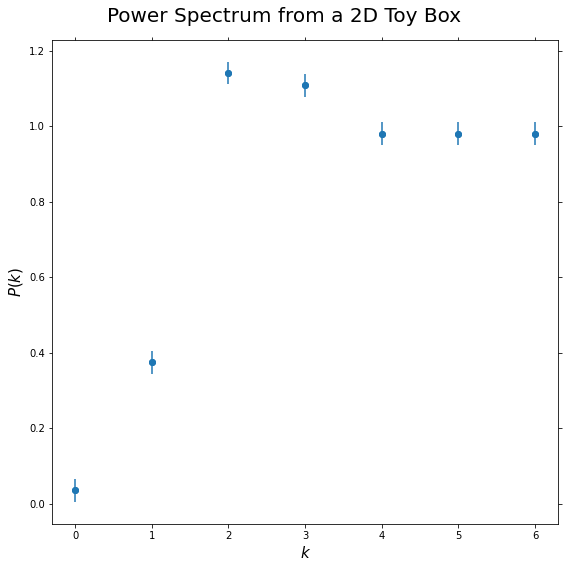

<function __main__.power_spectra_plot(input_k, fourier_array, start, end, sigma)>

In [147]:
generate_pk_2D(7, start, end, 0.03)

In [141]:
#we want an n input into the power_spectra_2D function to decide how many bins we want
    #would be (k_max-k_min)/n
#figure out how to include the start and end arrays into the 2D function

#could move to the 3D case by including another for loop for positions, corresponding_values, and avg_values functions
    #ex: i, j, k positions in the for loop
    
#figure out why the end of my function is turning out empty values for larger test cases?
#WE NEED TO SET THE LAST END ARRAY VALUE AS K(MAX) VALUE, IF LARGER IT WILL RETURN EMPTY



In [148]:
def generate_pk_2D (npix, start, end, sigma):
    
    #creating an array with npix dimensions
    toy_box = np.random.normal(size = (npix, npix))
    
    #fourier transforming box (shifts included)
    k_box = cosmo_transform(toy_box)
    
    #squaring values to find amplitude array
    amplitude = np.abs(k_box)**2
    
    #dividing by original volume of box
    Area = npix*npix
    
    #getting the power spectra
    P_k = (amplitude/Area)
    
    #creating frequency arrays
    #THIS IS THE K_X ARRAY
    k_x = kx_frequency_array(npix)
    #THIS IS THE K_Y ARRAY
    k_y = ky_frequency_array(npix)
    #creating an array matching our toy box array
    kfreq2D = np.meshgrid(k_x, k_y)
    
    #normalisation factor
    #finding distance between pixels
    k_values = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)
    k_max = np.max(k_values)
    print("Max k:", k_max)
    
    
    #finding the element positions of the k-array using our given
    #k value ranges
    rings = find_element_positions(k_values, start, end)
    print(rings)
    print(len(rings))
    
    #getting the corresponding fourier array values given positions
    co_values = get_corresponding_values(k_values, P_k, start, end)
    
    #finding the average of all of these values at each index of 2D array
    averages = avg_corresponding_values(k_values, P_k, start, end)
   
    #creating the power_spectra plot
    power_spectra_plot(k_values, P_k, start, end, sigma)
    
    return power_spectra_plot

In [ ]:
start = [0, 1, 2, 3, 4, 5, 6]
end = [1, 2, 3, 4, 5, 6, 7]
